In [51]:
# Loan Approval Prediction based on Machine Learning Approach 

### Library Packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Using Pandas Loading a Dataset

In [55]:
df=pd.read_csv(r"train_loanPrediction.csv")

In [56]:
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Pre Processing

In [58]:
type(df)

pandas.core.frame.DataFrame

In [59]:
df.shape

(1480, 13)

In [60]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1443.000000,1480.000000,1480.000000,1430.000000,1456.000000,1354.000000
mean,0.786556,5420.054054,1668.158622,148.002797,341.587912,0.842688
std,1.013863,6127.461081,3111.846669,86.080796,66.759293,0.364229
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2873.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3750.000000,1287.000000,128.000000,360.000000,1.000000
75%,2.000000,5818.000000,2306.000000,166.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [61]:
df.isnull().sum()

Loan_ID                0
Gender                35
Married                5
Dependents            37
Education              0
Self_Employed         72
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            50
Loan_Amount_Term      24
Credit_History       126
Property_Area          0
Loan_Status            0
dtype: int64

In [62]:
df1=df.dropna()

In [63]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [64]:
type(df1)

pandas.core.frame.DataFrame

In [65]:
val=df1.index

In [66]:
df1['ApplicantIncome'].hist(bins=10)
plt.title("Application Income")
plt.xlabel('Amount')
plt.ylabel('No.of App')

Text(0, 0.5, 'No.of App')

In [67]:
df['CoapplicantIncome'].hist(bins=10)
plt.title("CoApplication Income")
plt.xlabel('Amount')
plt.ylabel('No.of CoApp')

Text(29.222222222222214, 0.5, 'No.of CoApp')

In [68]:
df['LoanAmount'].hist(bins=10) 
plt.title("Loan Amount")
plt.xlabel('Amount')
plt.ylabel('No.of CoApp')

Text(29.222222222222214, 0.5, 'No.of CoApp')

In [69]:
#combining the above 2 plots in a stacked chart
stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','red'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['green','red'], grid=False)

<Axes: xlabel='Gender'>

In [70]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount'].hist(bins=10) 
plt.xlabel('Amount')


Text(0.5, -12.72777777777778, 'Amount')

In [71]:
df2=df1.drop(["Loan_ID"],axis=1)

### LabelEncoder

In [73]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [74]:
df2['LGender'] = le.fit_transform(df2['Gender'].values.reshape(-1,1).ravel())
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1


In [75]:
df2['LMarried']=le.fit_transform(df2['Married'].values.reshape(-1,1).ravel())
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1


In [76]:
df2['LSelf_Employed']=le.fit_transform(df2["Self_Employed"].values.reshape(-1,1).ravel())

In [77]:
df2['LLoan_Status']=le.fit_transform(df2["Loan_Status"].values.reshape(-1,1).ravel())

In [78]:
df2['LEducation']=le.fit_transform(df2["Education"].values.reshape(-1,1).ravel())

In [79]:
df2['LProperty_Area']=le.fit_transform(df2["Property_Area"].values.reshape(-1,1).ravel())
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LGender,LMarried,LSelf_Employed,LLoan_Status,LEducation,LProperty_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,1,1,0,2
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,0,1,1,2
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,1,0,2
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1,1,1,1,0,2


In [80]:
df2=df2.drop(["Self_Employed"],axis=1)
df2=df2.drop(["Loan_Status"],axis=1)
df2=df2.drop(["Property_Area"],axis=1)
df2=df2.drop(["Married"],axis=1)
df2=df2.drop(["Gender"],axis=1)
df2=df2.drop(["Education"],axis=1)
df2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LGender,LMarried,LSelf_Employed,LLoan_Status,LEducation,LProperty_Area
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,1,1,0,2
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1,2
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1,0,2
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,1,1,0,2


### Classification

In [82]:
x=df2.iloc[:,df2.columns !='LLoan_Status']
y=df2.iloc[:,df2.columns =='LLoan_Status']

In [83]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LGender,LMarried,LSelf_Employed,LEducation,LProperty_Area
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,1,0,2
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,2
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2
5,2.0,5417,4196.0,267.0,360.0,1.0,1,1,1,0,2


In [84]:
y.head()

,LLoan_Status
1,0
2,1
3,1
4,1
5,1


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [87]:
x_train.shape

(928, 11)

In [88]:
x_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LGender,LMarried,LSelf_Employed,LEducation,LProperty_Area
818,1.0,4608,2845.0,140.0,180.0,1.0,0,1,0,0,1
195,1.0,3125,2583.0,170.0,360.0,1.0,1,1,0,0,1
745,1.0,3400,2500.0,173.0,360.0,1.0,1,1,0,0,1
1047,0.0,2346,1600.0,132.0,360.0,1.0,1,0,0,1,1
599,2.0,5780,0.0,192.0,360.0,1.0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
1346,3.0,9504,0.0,275.0,360.0,1.0,1,1,0,0,0
724,1.0,4283,3000.0,172.0,84.0,1.0,1,1,0,0,0
1292,2.0,2500,4600.0,176.0,360.0,1.0,1,1,1,0,0
100,2.0,4288,3263.0,133.0,180.0,1.0,1,1,0,1,2


In [89]:
y_train

,LLoan_Status
818,1
195,0
745,1
1047,1
599,1
...,...
1346,1
724,0
1292,1
100,1


In [90]:
y_test.shape

(232, 1)

In [91]:
np1=df2.values

C:\Users\Deepa\AppData\Local\Temp\ipykernel_8028\4234423503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", order=['Male','Female'], data=df, palette="Set1")


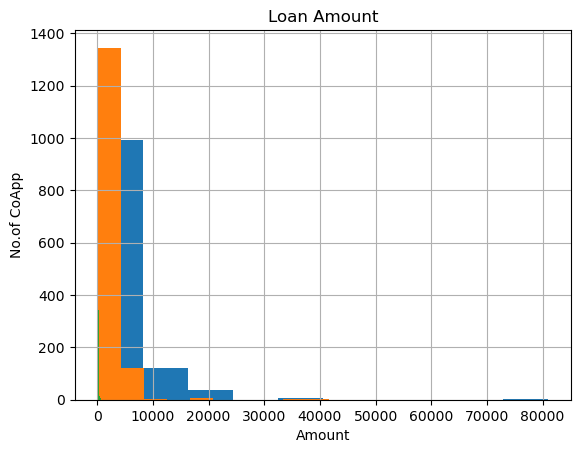

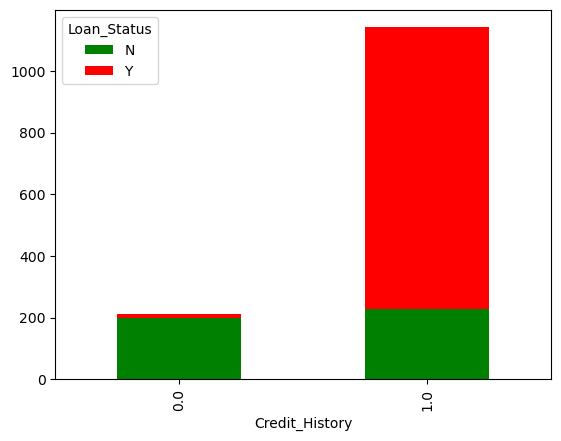

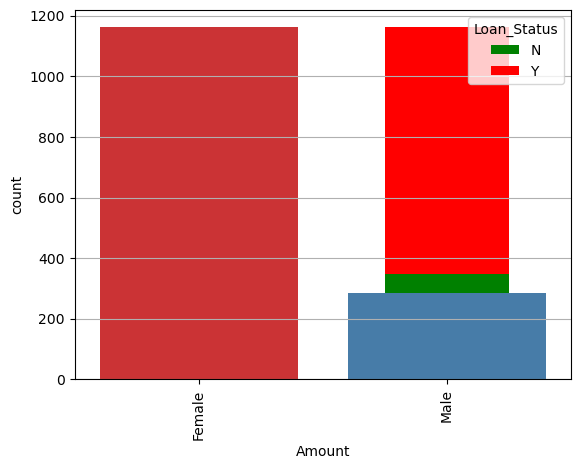

In [92]:
#plt.subplot(1,2,1)
sns.countplot(x="Gender", order=['Male','Female'], data=df, palette="Set1")
plt.show()

C:\Users\Deepa\AppData\Local\Temp\ipykernel_8028\2068639771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", order=['Yes','No'], data=df, palette="Set1")


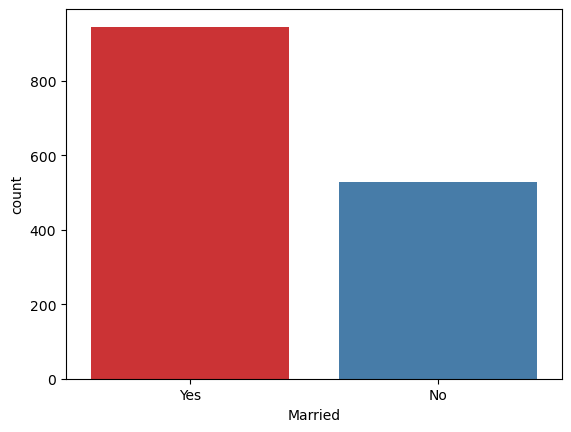

In [93]:
#plt.subplot(1,2,1)
sns.countplot(x="Married", order=['Yes','No'], data=df, palette="Set1")
plt.show()

C:\Users\Deepa\AppData\Local\Temp\ipykernel_8028\94966207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", order=['Urban','Rural','Semiurban'], data=df, palette="Set1")


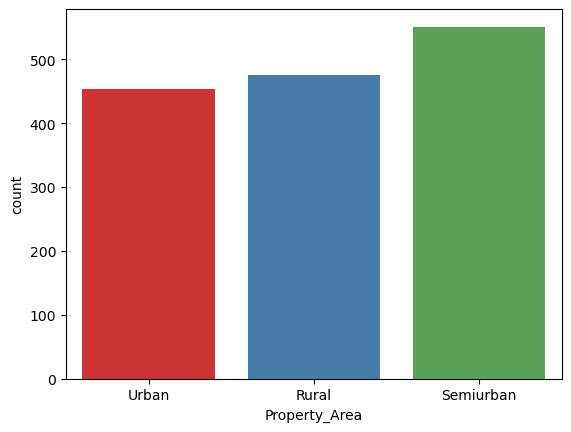

In [94]:
#plt.subplot(1,2,1)
sns.countplot(x="Property_Area", order=['Urban','Rural','Semiurban'], data=df, palette="Set1")
plt.show()

C:\Users\Deepa\AppData\Local\Temp\ipykernel_8028\256295193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", order=['Graduate','Not Graduate'], data=df, palette="Set1")


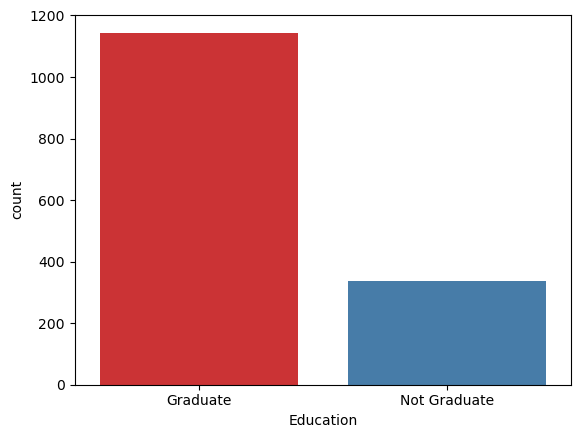

In [95]:
#plt.subplot(1,2,1)
sns.countplot(x="Education", order=['Graduate','Not Graduate'], data=df, palette="Set1")
plt.show()

# Training the Algorithams

#### 1.SVM-Support Vector Machine

In [98]:
from sklearn import svm
from sklearn import metrics

In [99]:
model1=svm.SVC()

In [100]:
model1.fit(x_train,y_train)

C:\Users\Deepa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [101]:
xpredict=model1.predict(x_test)

In [102]:
svm=metrics.accuracy_score(y_test,xpredict)
print(svm)

0.728448275862069


In [103]:
svm=model1.score(x_test,y_test)
svm

0.728448275862069

### 2.LogisticRegression

In [105]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()

In [106]:
model2.fit(x_train,y_train)

C:\Users\Deepa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Deepa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
xpredict=model2.predict(x_test)

In [108]:
lr=metrics.accuracy_score(y_test,xpredict)
print(lr)

0.7974137931034483


### 3.Decision Tree algorithm 

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
model3=DecisionTreeClassifier()

In [112]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
xpredict=model3.predict(x_test)

In [114]:
dt=metrics.accuracy_score(y_test,xpredict)
print(dt)

0.9353448275862069


# Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB

In [117]:
model4=GaussianNB()

In [118]:
model4.fit(x_train,y_train)

C:\Users\Deepa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [119]:
xpredict=model4.predict(x_test)

In [120]:
nv=metrics.accuracy_score(y_test,xpredict)
print(dt)

0.9353448275862069


# Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(x_test)

# Evaluate performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

C:\Users\Deepa\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.9483


 # Graph_Comparision

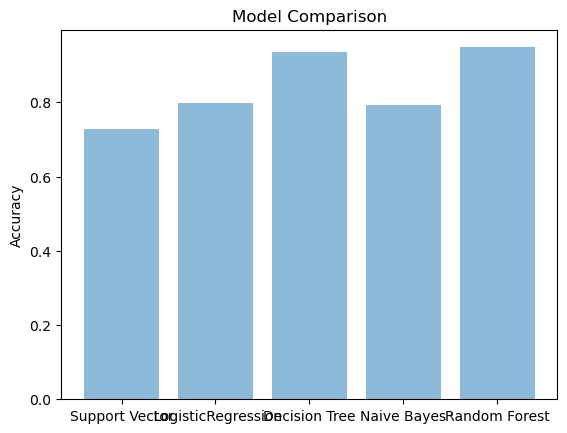

In [125]:
import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ('Support Vector',' LogisticRegression','Decision Tree' , 'Naive Bayes', 'Random Forest')
y_pos = np.arange(len(objects))
performance = [svm,lr,dt,nv, accuracy]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Model Comparison')

plt.show()

In [126]:
import pickle
pickle.dump(rf_model, open('rf_model.pkl','wb'))